# MAIN

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
!unzip "/content/drive/My Drive/default+of+credit+card+clients.zip" -d "/content/drive/My Drive/credit_card_data"

Archive:  /content/drive/My Drive/default+of+credit+card+clients.zip
replace /content/drive/My Drive/credit_card_data/default of credit card clients.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
path_file = "/content/drive/My Drive/credit_card_data/default of credit card clients.xls"

In [85]:
df = pd.read_excel(path_file, header=1)

In [86]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [88]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [89]:
df.rename(columns={
    'default payment next month': 'def_pay', # ubah nama kolom krn yg asli terlalu panjang
    'PAY_0': 'PAY_1' #biar urut aja
}, inplace=True)

In [90]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [91]:
print("Unik Education:", df['EDUCATION'].unique())
print("Unik Marriage:", df['MARRIAGE'].unique())

Unik Education: [2 1 3 5 4 6 0]
Unik Marriage: [1 2 3 0]


In [92]:
df.loc[(df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6), 'EDUCATION'] = 4

In [93]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [94]:
print("Unik Education:", df['EDUCATION'].unique())
print("Unik Marriage:", df['MARRIAGE'].unique())

Unik Education: [2 1 3 4]
Unik Marriage: [1 2 3]


feature engineering

In [95]:
df['utilization'] = df.apply(lambda x: x['BILL_AMT1'] / x['LIMIT_BAL'] if x['LIMIT_BAL'] > 0 else 0, axis=1)

In [96]:
pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['pay_score'] = df[pay_cols].sum(axis=1)

In [97]:
df['bill_trend'] = df['BILL_AMT1'] - df['BILL_AMT2']

In [98]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [99]:
X = df.drop(['ID', 'def_pay'], axis=1)

# y adalah kolom 'def_pay' saja
y = df['def_pay']

print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)

Dimensi X: (30000, 29)
Dimensi y: (30000,)


split

In [100]:
from sklearn.model_selection import train_test_split

# random_state=42 fungsinya agar hasil acakannya konsisten (tiap dijalankan hasilnya sama)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah Data Latih:", X_train.shape[0])
print("Jumlah Data Uji  :", X_test.shape[0])

Jumlah Data Latih: 24000
Jumlah Data Uji  : 6000


scaling

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dimensi Training: {X_train.shape}")

Dimensi Training: (24000, 29)


In [102]:
print(f"   Jumlah data latih awal: {y_train.value_counts().to_dict()}")

   Jumlah data latih awal: {0: 18677, 1: 5323}


**SMOTE**

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [104]:
print(f"   Jumlah data latih setelah SMOTE: {y_train_smote.value_counts().to_dict()}")

   Jumlah data latih setelah SMOTE: {0: 18677, 1: 18677}


modeling

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # Ini untuk ANN
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint


logistic regression

In [106]:
# Setup Tuning
rs_lr = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    {"C": uniform(0.1, 10)},
    n_iter=5, scoring='recall', cv=3, n_jobs=-1, random_state=42
)
rs_lr.fit(X_train_smote, y_train_smote)

# Evaluasi
best_lr = rs_lr.best_estimator_
y_prob = best_lr.predict_proba(X_test_scaled)[:, 1]
y_pred_tuned = (y_prob > 0.25).astype(int) # Threshold Agresif

print(f"Best Recall Validasi: {rs_lr.best_score_:.2%}")
print("\n--- Laporan Logistic Regression (Threshold 0.25) ---")
print(classification_report(y_test, y_pred_tuned))

Best Recall Validasi: 64.58%

--- Laporan Logistic Regression (Threshold 0.25) ---
              precision    recall  f1-score   support

           0       0.90      0.18      0.30      4687
           1       0.24      0.93      0.38      1313

    accuracy                           0.35      6000
   macro avg       0.57      0.56      0.34      6000
weighted avg       0.76      0.35      0.32      6000



decision tree

In [107]:
# Setup Tuning
rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    {"max_depth": [10, 20, None], "min_samples_split": randint(2, 20)},
    n_iter=10, scoring='recall', cv=3, n_jobs=-1, random_state=42
)
rs_dt.fit(X_train_smote, y_train_smote)

# Evaluasi
best_dt = rs_dt.best_estimator_
y_prob = best_dt.predict_proba(X_test_scaled)[:, 1]
y_pred_tuned = (y_prob > 0.25).astype(int)

print(f"Best Recall Validasi: {rs_dt.best_score_:.2%}")
print("\n--- Laporan Decision Tree (Threshold 0.25) ---")
print(classification_report(y_test, y_pred_tuned))

Best Recall Validasi: 76.47%

--- Laporan Decision Tree (Threshold 0.25) ---
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      4687
           1       0.35      0.52      0.42      1313

    accuracy                           0.68      6000
   macro avg       0.60      0.63      0.60      6000
weighted avg       0.74      0.68      0.70      6000



random forest

In [108]:
# Setup Tuning
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42),
    {"n_estimators": [100, 200], "max_depth": [10, 20], "class_weight": ["balanced", None]},
    n_iter=5, scoring='recall', cv=3, n_jobs=-1, random_state=42
)
rs_rf.fit(X_train_smote, y_train_smote)

# Evaluasi
best_rf = rs_rf.best_estimator_
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]
y_pred_tuned = (y_prob > 0.25).astype(int)

print(f"Best Recall Validasi: {rs_rf.best_score_:.2%}")
print("\n--- Laporan Random Forest (Threshold 0.25) ---")
print(classification_report(y_test, y_pred_tuned))

Best Recall Validasi: 80.99%

--- Laporan Random Forest (Threshold 0.25) ---
              precision    recall  f1-score   support

           0       0.91      0.50      0.65      4687
           1       0.32      0.82      0.46      1313

    accuracy                           0.57      6000
   macro avg       0.61      0.66      0.55      6000
weighted avg       0.78      0.57      0.61      6000



xgboost

In [109]:
# Setup Tuning
rs_xgb = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
    {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6]},
    n_iter=5, scoring='recall', cv=3, n_jobs=-1, random_state=42
)
rs_xgb.fit(X_train_smote, y_train_smote)

# Evaluasi
best_xgb = rs_xgb.best_estimator_
y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]
y_pred_tuned = (y_prob > 0.25).astype(int)

print(f"Best Recall Validasi: {rs_xgb.best_score_:.2%}")
print("\n--- Laporan XGBoost (Threshold 0.25) ---")
print(classification_report(y_test, y_pred_tuned))

# Cek Tangkapan Maling
cm = confusion_matrix(y_test, y_pred_tuned)
print(f"Maling Tertangkap: {cm[1,1]} dari {sum(y_test)} (Recall: {cm[1,1]/sum(y_test):.2%})")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:15:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Recall Validasi: 72.51%

--- Laporan XGBoost (Threshold 0.25) ---
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      4687
           1       0.37      0.71      0.48      1313

    accuracy                           0.67      6000
   macro avg       0.63      0.68      0.62      6000
weighted avg       0.78      0.67      0.70      6000

Maling Tertangkap: 929 dari 1313 (Recall: 70.75%)


In [110]:
# Setup Tuning
rs_ann = RandomizedSearchCV(
    MLPClassifier(max_iter=500, early_stopping=True, random_state=42),
    {"hidden_layer_sizes": [(50,), (100,)], "activation": ['relu', 'tanh']},
    n_iter=3, scoring='recall', cv=3, n_jobs=-1, random_state=42
)
rs_ann.fit(X_train_smote, y_train_smote)

# Evaluasi
best_ann = rs_ann.best_estimator_
y_prob = best_ann.predict_proba(X_test_scaled)[:, 1]
y_pred_tuned = (y_prob > 0.25).astype(int)

print(f"Best Recall Validasi: {rs_ann.best_score_:.2%}")
print("\n--- Laporan ANN (Threshold 0.25) ---")
print(classification_report(y_test, y_pred_tuned))

Best Recall Validasi: 66.82%

--- Laporan ANN (Threshold 0.25) ---
              precision    recall  f1-score   support

           0       0.92      0.40      0.55      4687
           1       0.29      0.87      0.43      1313

    accuracy                           0.50      6000
   macro avg       0.60      0.63      0.49      6000
weighted avg       0.78      0.50      0.53      6000



In [111]:
all_models = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "ANN (MLP)": best_ann
}

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

summary_data = []
threshold = 0.25 # pakai standar agresif biar adil

for name, model in all_models.items():
    # ambil Probabilitas
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        # jaga-jaga kalau ada model yang gak support probabilitas
        y_prob = model.predict(X_test_scaled)

    # Terapkan Threshold
    y_pred_final = (y_prob > threshold).astype(int)

    # Hitung Metrik Fokus ke Kelas 1 (Gagal Bayar)
    acc = accuracy_score(y_test, y_pred_final)
    rec = recall_score(y_test, y_pred_final, pos_label=1)
    prec = precision_score(y_test, y_pred_final, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred_final, pos_label=1)

    summary_data.append({
        "Model": name,
        "Recall": rec,
        "Precision": prec,
        "Accuracy": acc,
        "F1-Score": f1
    })

In [113]:
df_summary = pd.DataFrame(summary_data)

# Urutkan berdasarkan Recall Tertinggi
df_summary = df_summary.sort_values(by="Recall", ascending=False).reset_index(drop=True)

styled_table = df_summary.style.format({
    "Recall": "{:.2%}",
    "Precision": "{:.2%}",
    "Accuracy": "{:.2%}",
    "F1-Score": "{:.2%}"
}).background_gradient(
    subset=["Recall"], cmap="Greens"
).background_gradient(
    subset=["Accuracy"], cmap="Blues"
).set_properties(**{'text-align': 'center'})

# Tampilkan
print("Tabel Klasemen Akhir:")
display(styled_table)

Tabel Klasemen Akhir:


,Model,Recall,Precision,Accuracy,F1-Score
0,Logistic Regression,92.92%,24.17%,34.67%,38.36%
1,ANN (MLP),87.13%,28.84%,50.13%,43.33%
2,Random Forest,82.18%,31.73%,57.40%,45.78%
3,XGBoost,70.75%,36.70%,66.90%,48.34%
4,Decision Tree,51.94%,35.12%,68.48%,41.90%


/tmp/ipython-input-680207728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Recall", y="Model", data=df_summary, palette="viridis")


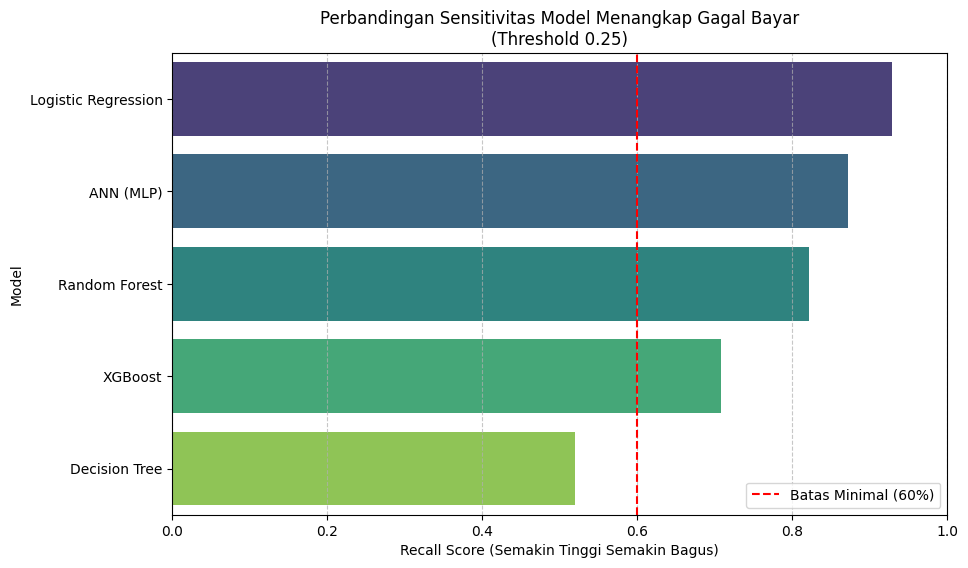

In [114]:
plt.figure(figsize=(10, 6))
# Plot Recall
sns.barplot(x="Recall", y="Model", data=df_summary, palette="viridis")
plt.axvline(0.6, color="red", linestyle="--", label="Batas Minimal (60%)")
plt.title(f"Perbandingan Sensitivitas Model Menangkap Gagal Bayar\n(Threshold {threshold})")
plt.xlabel("Recall Score (Semakin Tinggi Semakin Bagus)")
plt.legend()
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

TOP 10 FAKTOR PENYEBAB GAGAL BAYAR:
      Fitur  Importance
      PAY_1    0.090908
  pay_score    0.086586
  LIMIT_BAL    0.056634
utilization    0.048902
      PAY_2    0.044812
   PAY_AMT1    0.044101
        AGE    0.043531
 bill_trend    0.042709
   PAY_AMT2    0.040342
   PAY_AMT6    0.040104


/tmp/ipython-input-1559300995.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Fitur', data=df_imp.head(15), palette='viridis')


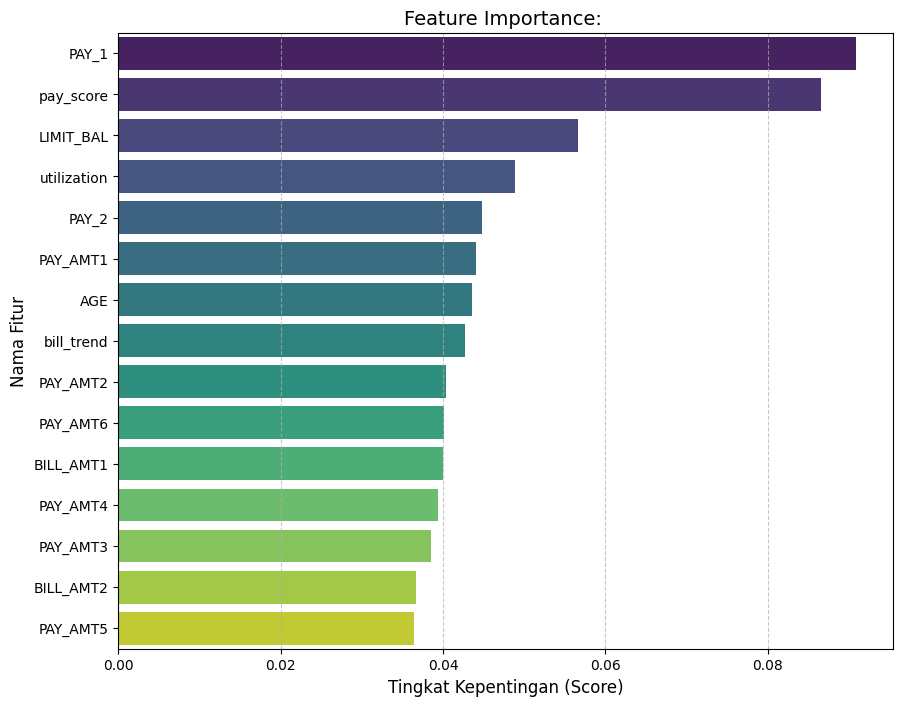

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_analisis = best_rf

if hasattr(model_analisis, 'feature_importances_'):
    importances = model_analisis.feature_importances_
    feature_names = X.columns

    df_imp = pd.DataFrame({
        'Fitur': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("TOP 10 FAKTOR PENYEBAB GAGAL BAYAR:")
    print(df_imp.head(10).to_string(index=False))

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Fitur', data=df_imp.head(15), palette='viridis')

    plt.title('Feature Importance: ', fontsize=14)
    plt.xlabel('Tingkat Kepentingan (Score)', fontsize=12)
    plt.ylabel('Nama Fitur', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()